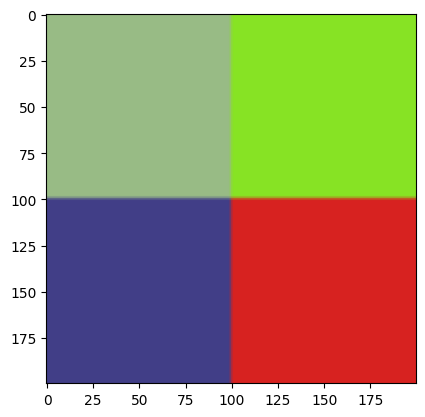

In [2]:
#task1
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import random

r  = 0
g  = 0
b= 0

#task 1
x=[(0,50),(50,100),(0,50),(50,100)]
y=[(0,50),(0,50),(50,100),(50,100)]

img=np.zeros((100,100,3),np.uint8) #full frame in black

for i in range (4):
    #choose random color for each square
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    img[x[i][0]:x[i][1], y[i][0]: y[i][1]] = r, g, b



img=cv.resize(img,(200,200))
plt.imshow(img)


In [ ]:
# task 2

import cv2 as cv
import matplotlib.pyplot as plt

# Read frames from any camera. Press Q to terminate the code,
# R to rotate the frame 90 degrees,
# C to save the frame on your device,
# S to save a video stream using OpenCV.
# G to convert the frame to grayscale,
# H to convert the frame to HSV space, and
# X to show (grayscale, HSV, rotated and original frames) together,
# Z to show only the original frame.

vid = cv.VideoCapture(0)
cap = 0
angle=0

r = 0
g = 0
h = 0
x = 0
s = 0
width, height = 1280, 720
saved = cv.VideoWriter("video.avi", cv.VideoWriter_fourcc(*'MJPG'), 20.0, (720, 480))

while 1:
    success, img = vid.read()
    # img = cv.resize(img,(width,height))

    if x:  # X to show (grayscale, HSV, rotated and original frames) together
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # grayscale
        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)  # hsv
        M = cv.getRotationMatrix2D((width / 2, height / 2), angle, 1)  # rotated
        rotate = cv.warpAffine(img, M, (width, height))
        cv.imshow("GRAY", gray)
        cv.imshow("HSV", hsv)
        cv.imshow("Rotated", rotate)
    if g:  # G to convert the frame to grayscale,
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # grayscale
    if h:  # H to convert the frame to HSV space
        img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    if r >= 1:  # R to rotate the frame 90 degrees
        if r == 1:
            angle = 90
        if r == 2:
            angle = 180
        if r == 3:
            angle = 180 + 90
        if r == 4:
            angle = 0
        M = cv.getRotationMatrix2D((width / 2, height / 2), angle, 1)
        img = cv.warpAffine(img, M, (width, height))
    if s:  # S to save a video stream using OpenCV
        saved.write(img)
    cv.imshow("Task 2", img)
    input = cv.waitKey(1)

    # key pressing:

    if input == ord('c'):  # C to save the frame on your device
        cv.imwrite(f"img {cap}.png", img)
        cap += 1
    elif input == ord('s'):
        s = 1
    elif input == ord('g'):
        g, h, x = 1, 0, 0
    elif input == ord('h'):
        h, g, x = 1, 0, 0
    elif input == ord('z'):  # Z to show only the original frame.
        if x:
            cv.destroyAllWindows()
        g = h = x = r = 0
    elif input == ord('r'):
        r = r + 1
        x = 0
        if r == 4:
            r = 0

    elif input == ord('x'):
        x, h, g = 1, 0, 0
    elif input == ord('q'):
        break
if s:  # S to save a video stream using OpenCV.
    vid.release()
    saved.release()

72.23122214660722
16.675891599775927


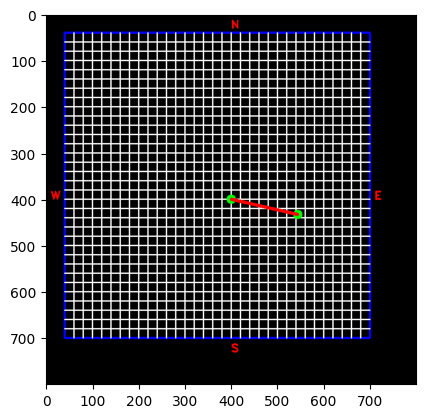

In [14]:
#task 3

#Read task 3.1 (Determining the location where the float will next surface) written in mate’s 2022 manual. 
#After reading the manual draw the map using OpenCV and solve the problem. 
#Assume that the co-pilot is going to enter the problem’s numbers manually using the terminal.
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

#background all black
img = np.zeros((800,800,3), np.uint8)
#width and height of the page
width= 800
height = 800

speed = eval(input("Please enter speed in m/s: "))
time = eval(input("Please enter in hours: "))
angle = eval(input("Please enter in degrees: "))

#calculations
time = time*60*60
speed = speed*time
speed/=1000


#change angles from rad to degree
x = speed*math.sin(math.radians(angle))
y = speed * math.cos(math.radians(angle))
cv.rectangle(img,(40,40),(700,700),(0,0,255),3)
y*=-1
print(x)
print(y)
x*=2
y*=2

i=60
#draw the grid on the window
while i <700:
    cv.line(img,(i,40),(i,700),(255, 255, 255), 2)
    if i<700:
        cv.line(img, (40,i), (700,i), (255, 255, 255), 2)
    i+=20

x+=(width/2)
y+=(height/2)

#display on the window
cv.putText(img, "N", (int(width/2),30), cv.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0),2)
cv.putText(img, "S", (int(width/2),730), cv.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0),2)
cv.putText(img, "W", (10,int(height/2)), cv.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0),2)
cv.putText(img, "E", (710,int(height/2)), cv.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0),2)
cv.circle(img, (int(width/2), int(height/2)), 10, (0, 255, 0), cv.FILLED)
cv.circle(img, (int(x),int(y)),10, (0,255,0), cv.FILLED)
cv.line(img,(int(width/2), int(height/2)), (int(x),int(y)), (255, 0, 0), 5)
plt.imshow(img)


In [ ]:
#task 4

#Use OpenCV’s Callback Function to code a script that can draw circles and delete them.
#The deletion feature should allow the user to delete the last drawn circle or all of them.

import random
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

circles=[]
img=np.zeros((512,512,3),np.uint8)

#mouse click definition
def mousePoints(event, x,y,flags,params):
    if event==cv.EVENT_LBUTTONDOWN:
        circles.append([x,y]) #add circle to the list
        print("EVENT_LBUTTONDOWN")
        
    if event==cv.EVENT_RBUTTONDOWN:
        circles.pop() #REMOVE THE LAST CIRCLE ADDED FROM THE LIST
        print("EVENT_RBUTTONDOWN")
        
while 1:
    img=np.zeros((512,512,3),np.uint8)
    for i in circles:
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
        thick=random.randint(0,10)
        cv.circle(img,i,75,(r,g,b),thick) #img,center,rad,color,thickness
    cv.imshow("Circles", img)
    cv.setMouseCallback("Circles", mousePoints)
    if cv.waitKey(1) & 0xFF== ord('q'):
        break
        
            
      

In [1]:
#task 5

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

circles=np.zeros((4,2),np.int32)
counter=0
img=cv.imread('Photos/book.jpg')

#mouse click definition
def mousePoints(event, x,y,flags,params):
    global counter
    if event==cv.EVENT_LBUTTONDOWN:
        circles[counter]=x,y
        counter=counter+1
        print(circles)

plt.show()

while True:
    if counter==4:
        width,height=250,350
        pts1=np.float32([circles[0],circles[1],circles[2],circles[3]])
        pts2=np.float32([[0,0],[width,0],[0,height],[width,height]])
        matrix=cv.getPerspectiveTransform(pts1,pts2)
        imgOutput=cv.warpPerspective(img,matrix,(width,height))
        plt.imshow(imgOutput)
        plt.show()
        
    for x in range (0,4):
        cv.circle(img,(circles[x][0],circles[x][1]),15,(0,255,0),cv.FILLED)
    
    plt.imshow(img)
    cv.setMouseCallback("pic3",mousePoints)
    #plt.show()
        
    
         